In [90]:
from datasets import wine_red_dataset, wine_white_dataset
wine_red = wine_red_dataset()
wine_white = wine_white_dataset()

# Missing values



## Drop the rows where all elements are missing

In [91]:
wine_red.dropna(how='all', inplace=True)
display(wine_red.isna().sum())

ID                       0
fixed acidity           17
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
flavanoids               0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                      15
sulphates                0
magnesium                0
alcohol                  0
lightness                0
quality                  0
dtype: int64

## Show rows with missing values

In [26]:
display(wine_red[wine_red.isnull().any(axis=1)])

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,flavanoids,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,magnesium,alcohol,lightness,quality
11,12.0,7.5,0.50,0.36,6.1,0.07,0.53,17.0,102.0,1.00,NaN,0.80,0.42,10.50,0.101,5.0
22,23.0,NaN,0.43,0.21,1.6,0.11,0.53,10.0,37.0,1.00,3.17,0.91,0.59,9.50,0.112,5.0
61,62.0,NaN,0.69,0.49,1.8,0.12,0.53,20.0,112.0,1.00,3.21,0.71,0.22,9.30,0.113,5.0
97,98.0,NaN,0.50,0.25,2.0,0.07,0.53,3.0,22.0,1.00,3.25,0.63,0.26,9.20,0.113,5.0
187,188.0,NaN,0.71,0.10,2.6,0.08,0.53,9.0,26.0,1.00,3.39,0.49,0.00,9.70,0.105,5.0
274,275.0,NaN,0.65,0.18,7.0,0.09,0.53,27.0,94.0,1.00,3.38,0.77,0.96,9.40,0.109,5.0
409,410.0,NaN,0.46,0.49,4.5,0.07,0.53,26.0,49.0,1.00,3.05,0.57,0.14,9.60,0.112,4.0
410,411.0,NaN,0.43,0.34,2.5,0.08,0.53,26.0,86.0,1.00,3.38,0.62,0.62,9.50,0.110,6.0
411,412.0,NaN,0.45,0.35,2.4,0.08,0.53,23.0,78.0,1.00,3.38,0.62,0.58,9.50,0.107,5.0
412,413.0,NaN,0.74,0.16,1.9,0.10,0.53,15.0,77.0,1.00,3.27,0.64,0.69,9.30,0.108,5.0


- ### there are no rows where both features are missing at the same time
- ### the missing fixed aciditiy values seem to be real/unexpected missing as all wines need to have acid
- ### the missing ph values seem to be real/unexpected missing as all liquids have a ph value

-> We may have to generate values for the missing ones

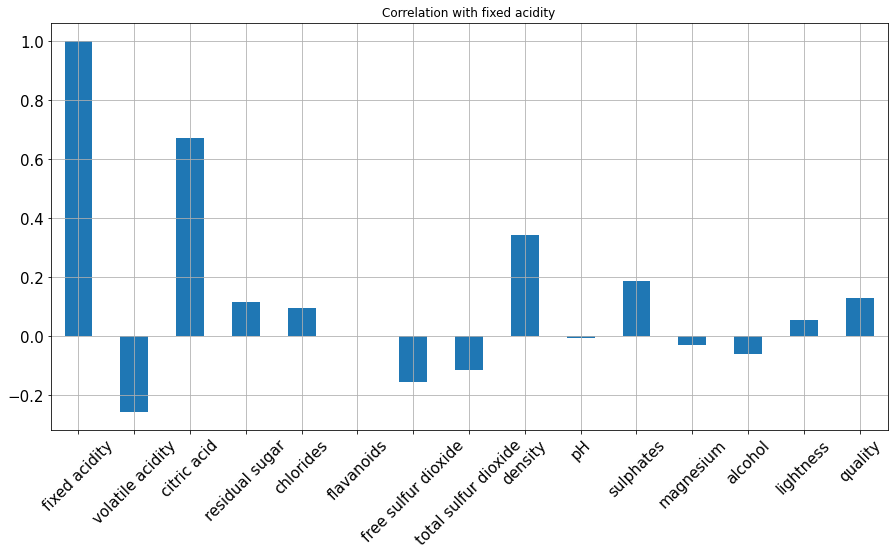

In [14]:
corr_fix_acid = wine_red.drop('ID', axis=1).corrwith(wine_red['fixed acidity']).plot.bar(
        figsize = (15, 7.5), title = "Correlation with fixed acidity", fontsize = 15,
        rot = 45, grid = True)

### fixed acidity seems to correlate with citric acid. From domain view this makes sense because the fixed acidity value is calculated from all acids. Because of this, the fixed acidity is a missing at random value. In our case, missing fixed acidity values can be calculated from the citric acid values


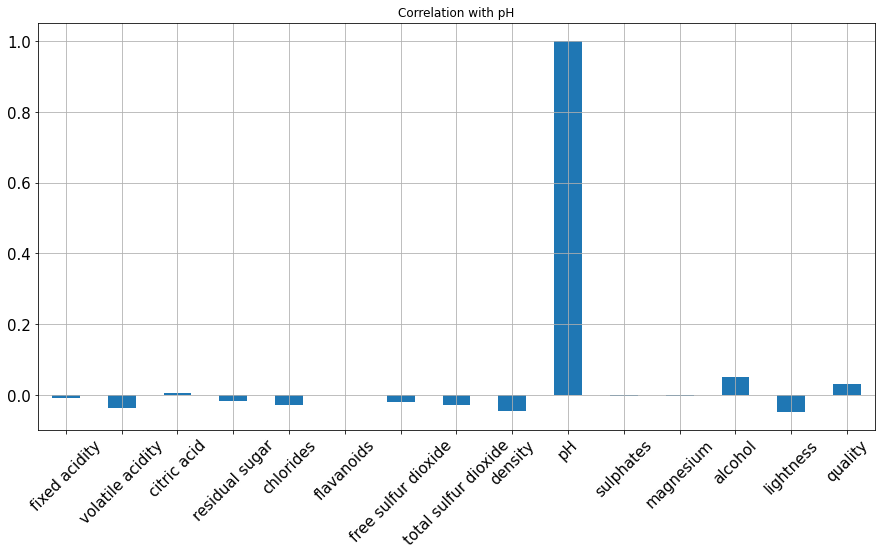

In [28]:
corr_ph = wine_red.drop('ID', axis=1).corrwith(wine_red['pH']).plot.bar(
        figsize = (15, 7.5), title = "Correlation with pH", fontsize = 15,
        rot = 45, grid = True)

### there is no major correlation with other features. Those missing values seem to be missing completely at random

# Features scaling

In [82]:
wine_red.describe(include='all')

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,flavanoids,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,magnesium,alcohol,lightness,quality
count,1597.000000,1580.000000,1597.000000,1597.000000,1597.000000,1597.00000,1.597000e+03,1597.000000,1597.000000,1597.000000,1582.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000
mean,799.013150,8.324747,0.528535,0.270946,2.539355,0.08789,5.300000e-01,15.863494,46.482780,0.998516,3.451732,0.657959,0.498585,10.421509,0.102004,5.634941
std,461.181154,1.744595,0.179698,0.194854,1.410686,0.04714,1.865759e-14,10.461657,32.913194,0.003556,3.456649,0.169527,0.286239,1.065529,0.009577,0.807302
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.01000,5.300000e-01,1.000000,6.000000,0.990000,2.740000,0.330000,0.000000,8.400000,0.071000,3.000000
25%,400.000000,7.100000,0.390000,0.090000,1.900000,0.07000,5.300000e-01,7.000000,22.000000,1.000000,3.210000,0.550000,0.260000,9.500000,0.095000,5.000000
50%,799.000000,7.900000,0.520000,0.260000,2.200000,0.08000,5.300000e-01,14.000000,38.000000,1.000000,3.310000,0.620000,0.510000,10.200000,0.103000,6.000000
75%,1198.000000,9.225000,0.640000,0.420000,2.600000,0.09000,5.300000e-01,21.000000,62.000000,1.000000,3.400000,0.730000,0.740000,11.100000,0.110000,6.000000
max,1599.000000,15.900000,1.580000,1.000000,15.500000,0.61000,5.300000e-01,72.000000,289.000000,1.000000,99.990000,2.000000,1.000000,14.900000,0.128000,8.000000


- => total sulfur dioxide has a high difference in the max value
- => free sulfur dioxide has a high difference in the max value

## Normalization

### MinMax normalization is used when the distribution is not a bell curve

In [86]:
from sklearn import preprocessing
import pandas as pd;
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def get_logist_regression_score(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7,random_state=1)
    lr = LogisticRegression().fit(x_train,y_train)
    return lr.score(x_test,y_test)

def normalize_feature(data, feature):
    scaler2 = preprocessing.MinMaxScaler()
    feature_normalized = scaler2.fit_transform(data[[feature]])
    new_data = data.copy()
    new_data[feature] = feature_normalized
    return new_data

x = wine_red.dropna().drop('ID', axis=1).drop('quality', axis=1)
y = wine_red.dropna()['quality']
score = get_logist_regression_score(x,y)
print('no features normalized score', score)

scaler = preprocessing.MinMaxScaler()
wine_red_normalized = pd.DataFrame(scaler.fit_transform(wine_red.drop('quality',axis=1)), columns=wine_red.columns.drop('quality'))
x = wine_red_normalized.dropna().drop('ID', axis=1)
y = wine_red.dropna()['quality']
score = get_logist_regression_score(x,y)
print('all features normalized score', score)


wine_red_normalized = normalize_feature(wine_red, 'total sulfur dioxide')
x = wine_red_normalized.dropna().drop('ID', axis=1)
y = wine_red.dropna()['quality']
score = get_logist_regression_score(x,y)
print('only total sulfur dioxide normalized score', score)

wine_red_normalized = normalize_feature(wine_red, 'total sulfur dioxide')
wine_red_normalized = normalize_feature(wine_red_normalized, 'free sulfur dioxide')
x = wine_red_normalized.dropna().drop('ID', axis=1)
y = wine_red.dropna()['quality']
score = get_logist_regression_score(x,y)
print('total sulfur dioxide + free sulfur dioxide normalized score', score)

x = wine_red.dropna().drop('ID', axis=1).drop('total sulfur dioxide', axis=1)
y = wine_red.dropna()['quality']
score = get_logist_regression_score(x,y)
print('no features normalized without total sulfur dioxide score', score)

x = wine_red.dropna().drop('ID', axis=1).drop('total sulfur dioxide', axis=1).drop('free sulfur dioxide', axis=1)
y = wine_red.dropna()['quality']
score = get_logist_regression_score(x,y)
print('no features normalized without total sulfur dioxide without free sulfur dioxide score', score)

no features normalized score 0.548936170212766
all features normalized score 0.5936170212765958
only total sulfur dioxide normalized score 0.8723404255319149
total sulfur dioxide + free sulfur dioxide normalized score 0.9063829787234042
no features normalized without total sulfur dioxide score 0.8702127659574468
no features normalized without total sulfur dioxide without free sulfur dioxide score 0.8893617021276595


total sulfur dioxide and free sulfur dioxide seem to have a scaling which does not work well with this dataset. We should either drop them or normalize them as shown above

## Standardization

Standardization is an alternative scaling method and typically rescales data to have a specific mean and standard deviation of 1

In [88]:
from sklearn import preprocessing
import pandas as pd;
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def get_logist_regression_score(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7,random_state=1)
    lr = LogisticRegression().fit(x_train,y_train)
    return lr.score(x_test,y_test)

def standardize_feature(data, feature):
    scaler2 = preprocessing.StandardScaler()
    feature_normalized = scaler2.fit_transform(data[[feature]])
    new_data = data.copy()
    new_data[feature] = feature_normalized
    return new_data

x = wine_red.dropna().drop('ID', axis=1).drop('quality', axis=1)
y = wine_red.dropna()['quality']
score = get_logist_regression_score(x,y)
print('no features standardized score', score)

scaler = preprocessing.StandardScaler()
wine_red_standardized = pd.DataFrame(scaler.fit_transform(wine_red.drop('quality',axis=1)), columns=wine_red.columns.drop('quality'))
x = wine_red_standardized.dropna().drop('ID', axis=1)
y = wine_red.dropna()['quality']
score = get_logist_regression_score(x,y)
print('all features standardized score', score)


wine_red_standardized = standardize_feature(wine_red, 'total sulfur dioxide')
x = wine_red_standardized.dropna().drop('ID', axis=1)
y = wine_red.dropna()['quality']
score = get_logist_regression_score(x,y)
print('only total sulfur dioxide standardized score', score)

wine_red_standardized = standardize_feature(wine_red, 'total sulfur dioxide')
wine_red_standardized = standardize_feature(wine_red_standardized, 'free sulfur dioxide')
x = wine_red_standardized.dropna().drop('ID', axis=1)
y = wine_red.dropna()['quality']
score = get_logist_regression_score(x,y)
print('total sulfur dioxide + free sulfur dioxide standardized score', score)

x = wine_red.dropna().drop('ID', axis=1).drop('total sulfur dioxide', axis=1)
y = wine_red.dropna()['quality']
score = get_logist_regression_score(x,y)
print('no features standardized without total sulfur dioxide score', score)

x = wine_red.dropna().drop('ID', axis=1).drop('total sulfur dioxide', axis=1).drop('free sulfur dioxide', axis=1)
y = wine_red.dropna()['quality']
score = get_logist_regression_score(x,y)
print('no features standardized without total sulfur dioxide without free sulfur dioxide score', score)

no features standardized score 0.548936170212766
all features standardized score 0.5936170212765958
only total sulfur dioxide standardized score 0.8702127659574468
total sulfur dioxide + free sulfur dioxide standardized score 0.9127659574468086
no features standardized without total sulfur dioxide score 0.8702127659574468
no features standardized without total sulfur dioxide without free sulfur dioxide score 0.8893617021276595


data is being standardized feature wise => no effect on correlation

# Noise


In [94]:
#Excursus to ensemble learning
#Our noise filter additionally requires ensemble learning with a majority voting approach
#This is a general example for this approach
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_predict

# Define 3 classifiers
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

# define data
x = wine_red.dropna().drop('ID', axis=1).drop('quality', axis=1)
y = wine_red.dropna()['quality']

# merge 3 classifiers into one voting classifier
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

# train voting classifier with k-fold method
y_pred = cross_val_predict(eclf1, x, y, cv=3)

# save predictions, original quality and correct prediction boolean in data frame
result = pd.DataFrame(y_pred, columns=['Prediction'])
result['quality'] = y
delta_treshold = 2.5
result['Correct Prediction']= abs(result['Prediction'] - result['quality']) < delta_treshold

display(result.shape)
display(result)

# select all incorrect predicted data
print('False predictions')
delta_result = result[result['Correct Prediction'] == False]
display(delta_result.shape)
display(delta_result)

(1565, 3)

,Prediction,quality,Correct Prediction
0,5.0,5.0,True
1,5.0,5.0,True
2,5.0,5.0,True
3,5.0,6.0,True
4,5.0,5.0,True
...,...,...,...
1560,6.0,5.0,True
1561,6.0,5.0,True
1562,6.0,5.0,True
1563,5.0,5.0,True


False predictions


(51, 3)

,Prediction,quality,Correct Prediction
11,5.0,NaN,False
22,5.0,NaN,False
61,4.0,NaN,False
62,4.0,7.0,False
97,4.0,NaN,False
102,3.0,6.0,False
187,5.0,NaN,False
267,5.0,8.0,False
274,5.0,NaN,False
275,3.0,6.0,False


# Outliers


In [27]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import IsolationForest
wine_red_without_na = wine_red.dropna()
display(wine_red_without_na.shape)
X = wine_red_without_na.drop('ID', axis=1).drop('quality', axis=1)
y = wine_red_without_na['quality']


iso = IsolationForest(contamination=0.1)
y_out = iso.fit_predict(X)

# build a mask to select all rows that are not outliers (inlier=1, outlier=-1)
mask = y_out != 1
X_outliers, y_outliers = X[mask], y[mask]

# Inliers vs. Outliers
print("Inliers: ",X.shape[0]-X_outliers.shape[0],"Outliers:",X_outliers.shape[0])

# display(X_red)

display('Outliers data:', X_outliers)

(1565, 16)

Inliers:  1408 Outliers: 157


'Outliers data:'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,flavanoids,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,magnesium,alcohol,lightness
14,8.9,0.62,0.18,3.8,0.18,0.53,52.0,145.0,1.00,3.16,0.88,0.90,9.2,0.111
15,8.9,0.62,0.19,3.9,0.17,0.53,51.0,148.0,1.00,3.17,0.93,0.91,9.2,0.115
17,8.1,0.56,0.28,1.7,0.37,0.53,16.0,56.0,1.00,3.11,1.28,0.90,9.3,0.116
19,7.9,0.32,0.51,1.8,0.34,0.53,17.0,56.0,1.00,3.04,1.08,0.08,9.2,0.117
33,6.9,0.61,0.12,10.7,0.07,0.53,40.0,83.0,1.00,3.45,0.52,0.83,9.4,0.107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,6.9,0.63,0.33,6.7,0.24,0.53,66.0,115.0,1.00,3.22,0.56,0.22,9.5,0.112
1566,6.7,0.16,0.64,2.1,0.06,0.53,24.0,52.0,0.99,3.34,0.71,0.72,11.2,0.096
1570,6.4,0.36,0.53,2.2,0.23,0.53,19.0,35.0,0.99,3.37,0.93,0.88,12.4,0.088
1573,6.0,0.58,0.20,2.4,0.08,0.53,15.0,50.0,0.99,3.58,0.67,0.07,12.5,0.081
